In [4]:
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast
import requests
%matplotlib inline

In [5]:
df = pd.read_csv('/content/top_anime_dataset.csv', delimiter=',')
mdf = pd.read_csv('/content/top_anime_dataset_v2.csv', delimiter=',')

In [6]:
print(df.columns)
print(mdf.columns)
print(df.dtypes)
print(mdf.dtypes)

Index(['anime_id', 'anime_url', 'image_url', 'name', 'english_name',
       'japanese_names', 'score', 'genres', 'synopsis', 'type', 'episodes',
       'premiered', 'producers', 'studios', 'source', 'duration', 'rating',
       'rank', 'popularity', 'favorites', 'scored_by', 'members'],
      dtype='object')
Index(['anime_id', 'anime_url', 'image_url', 'name', 'english_name',
       'japanese_names', 'score', 'genres', 'themes', 'demographics',
       'synopsis', 'type', 'episodes', 'premiered', 'producers', 'studios',
       'source', 'duration', 'rating', 'rank', 'popularity', 'favorites',
       'scored_by', 'members'],
      dtype='object')
anime_id            int64
anime_url          object
image_url          object
name               object
english_name       object
japanese_names     object
score             float64
genres             object
synopsis           object
type               object
episodes          float64
premiered          object
producers          object
studios  

In [7]:
cantidad_filas = df.shape[0]
print("Cantidad de filas:", cantidad_filas)
cantidad_filas1 = mdf.shape[0]
print("Cantidad de filas:", cantidad_filas1)

Cantidad de filas: 15000
Cantidad de filas: 15000


In [8]:
api_url = "https://api.jikan.moe/v4/anime"

# IDs de los animes principales de cada saga
anime_ids = {
    "Dragon Ball": 223,     # ID de Dragon Ball en MyAnimeList
    "Naruto": 20,           # ID de Naruto
    "One Piece": 21,        # ID de One Piece
    "Bleach": 269           # ID de Bleach
}

anime_data = []

for saga, anime_id in anime_ids.items():
    response = requests.get(f"{api_url}/{anime_id}")  # Se consulta por ID

    print(f"Consultando {saga} - Código de respuesta: {response.status_code}")

    if response.status_code == 200:
        json_data = response.json().get("data", {})

        if json_data:
            anime_data.append({
                "name": json_data.get("title"),
                "score": json_data.get("score"),
                "episodes": json_data.get("episodes"),
                "year": json_data.get("aired", {}).get("from", "")[:4] if json_data.get("aired") else "Desconocido",
                "studio": json_data.get("studios")[0]["name"] if json_data.get("studios") else "Desconocido"
            })
            print(f"✅ Datos obtenidos para {saga}")
        else:
            print(f"⚠️ No se encontraron datos para {saga}")

print(f"\nTotal de animes obtenidos: {len(anime_data)}")

# Guardar en CSV si hay datos
if anime_data:
    cdf = pd.DataFrame(anime_data)
    cdf.to_csv("anime_dataset.csv", index=False)
    print("📂 Datos guardados en anime_dataset.csv")
else:
    print("❌ No hay datos para guardar.")

Consultando Dragon Ball - Código de respuesta: 200
✅ Datos obtenidos para Dragon Ball
Consultando Naruto - Código de respuesta: 200
✅ Datos obtenidos para Naruto
Consultando One Piece - Código de respuesta: 200
✅ Datos obtenidos para One Piece
Consultando Bleach - Código de respuesta: 200
✅ Datos obtenidos para Bleach

Total de animes obtenidos: 4
📂 Datos guardados en anime_dataset.csv


In [9]:
diferencias_df = df.merge(mdf, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
print("Filas en df pero no en mdf:")
print(diferencias_df)

Filas en df pero no en mdf:
       anime_id                                          anime_url  \
0         52991  https://myanimelist.net/anime/52991/Sousou_no_...   
1          5114  https://myanimelist.net/anime/5114/Fullmetal_A...   
2          9253     https://myanimelist.net/anime/9253/Steins_Gate   
3         60022  https://myanimelist.net/anime/60022/One_Piece_...   
4         38524  https://myanimelist.net/anime/38524/Shingeki_n...   
...         ...                                                ...   
14995      1595  https://myanimelist.net/anime/1595/Inma_Daitos...   
14996     49943  https://myanimelist.net/anime/49943/Cosplay_Ch...   
14997     38812      https://myanimelist.net/anime/38812/Botsuraku   
14998     38914  https://myanimelist.net/anime/38914/Papa_no_March   
14999     21715  https://myanimelist.net/anime/21715/Makkuramor...   

                                               image_url  \
0      https://cdn.myanimelist.net/images/anime/1015/...   
1      http

In [10]:
diferencias_mdf = df.merge(mdf, how='right', indicator=True).query('_merge == "right_only"').drop('_merge', axis=1)
print("Filas en mdf pero no en df:")
print(diferencias_mdf)

Filas en mdf pero no en df:
       anime_id                                          anime_url  \
0         52991  https://myanimelist.net/anime/52991/Sousou_no_...   
1          5114  https://myanimelist.net/anime/5114/Fullmetal_A...   
2          9253     https://myanimelist.net/anime/9253/Steins_Gate   
3         60022  https://myanimelist.net/anime/60022/One_Piece_...   
4         38524  https://myanimelist.net/anime/38524/Shingeki_n...   
...         ...                                                ...   
14995      4840  https://myanimelist.net/anime/4840/MEM__Yogosa...   
14996     35996  https://myanimelist.net/anime/35996/Naeil-eun_...   
14997     36095  https://myanimelist.net/anime/36095/Mirror_Mir...   
14998     37465  https://myanimelist.net/anime/37465/Echo__Koda...   
14999     38073  https://myanimelist.net/anime/38073/Kkoma_Bus_...   

                                               image_url  \
0      https://cdn.myanimelist.net/images/anime/1015/...   
1      http

In [11]:
columnas_comunes = df.columns.intersection(mdf.columns)
iguales = df[columnas_comunes] == mdf[columnas_comunes]
filas_iguales_mdf = mdf[iguales.all(axis=1)]
filas_diferentes = pd.concat([df[iguales.all(axis=1)], mdf[iguales.all(axis=1) == False]])
nuevo_df = pd.concat([filas_iguales_mdf, filas_diferentes])
print(nuevo_df)

       anime_id                                          anime_url  \
0         52991  https://myanimelist.net/anime/52991/Sousou_no_...   
1          5114  https://myanimelist.net/anime/5114/Fullmetal_A...   
2          9253     https://myanimelist.net/anime/9253/Steins_Gate   
3         60022  https://myanimelist.net/anime/60022/One_Piece_...   
4         38524  https://myanimelist.net/anime/38524/Shingeki_n...   
...         ...                                                ...   
14995      4840  https://myanimelist.net/anime/4840/MEM__Yogosa...   
14996     35996  https://myanimelist.net/anime/35996/Naeil-eun_...   
14997     36095  https://myanimelist.net/anime/36095/Mirror_Mir...   
14998     37465  https://myanimelist.net/anime/37465/Echo__Koda...   
14999     38073  https://myanimelist.net/anime/38073/Kkoma_Bus_...   

                                               image_url  \
0      https://cdn.myanimelist.net/images/anime/1015/...   
1      https://cdn.myanimelist.net/imag

In [12]:
print(nuevo_df.columns)

Index(['anime_id', 'anime_url', 'image_url', 'name', 'english_name',
       'japanese_names', 'score', 'genres', 'themes', 'demographics',
       'synopsis', 'type', 'episodes', 'premiered', 'producers', 'studios',
       'source', 'duration', 'rating', 'rank', 'popularity', 'favorites',
       'scored_by', 'members'],
      dtype='object')


In [13]:
nuevo_df = nuevo_df.drop(columns=['anime_url', 'image_url', 'english_name'])
print(nuevo_df.columns)

Index(['anime_id', 'name', 'japanese_names', 'score', 'genres', 'themes',
       'demographics', 'synopsis', 'type', 'episodes', 'premiered',
       'producers', 'studios', 'source', 'duration', 'rating', 'rank',
       'popularity', 'favorites', 'scored_by', 'members'],
      dtype='object')


In [14]:
print("Missing values in each column:")
print(nuevo_df.isnull().sum())

Missing values in each column:
anime_id              0
name                  0
japanese_names       46
score                 0
genres             1601
themes             5077
demographics      10592
synopsis            468
type                  1
episodes            112
premiered         10316
producers          5429
studios            2379
source                0
duration              0
rating               68
rank               3080
popularity            0
favorites             0
scored_by             0
members               0
dtype: int64


In [15]:
nuevo_df_rellenado = nuevo_df.fillna({
    'japanese_names': 'Unknown',
    'genres': 'Unknown',
    'themes': 'Unknown',
    'demographics': 'Unknown',
    'synopsis': 'Unknown',
    'type': 'Unknown',
    'episodes': 0,
    'premiered': 'Unknown',
    'producers': 'Unknown',
    'studios': 'Unknown',
    'source': 'Unknown',
    'duration': 0,
    'rating': 0,
    'rank': 0,
    'popularity': 0,
    'favorites': 0,
    'scored_by': 0,
    'members': 0
})

In [16]:
print("Missing values in each column:")
print(nuevo_df_rellenado.isnull().sum())


Missing values in each column:
anime_id          0
name              0
japanese_names    0
score             0
genres            0
themes            0
demographics      0
synopsis          0
type              0
episodes          0
premiered         0
producers         0
studios           0
source            0
duration          0
rating            0
rank              0
popularity        0
favorites         0
scored_by         0
members           0
dtype: int64


**eda**







> analisis de estudios



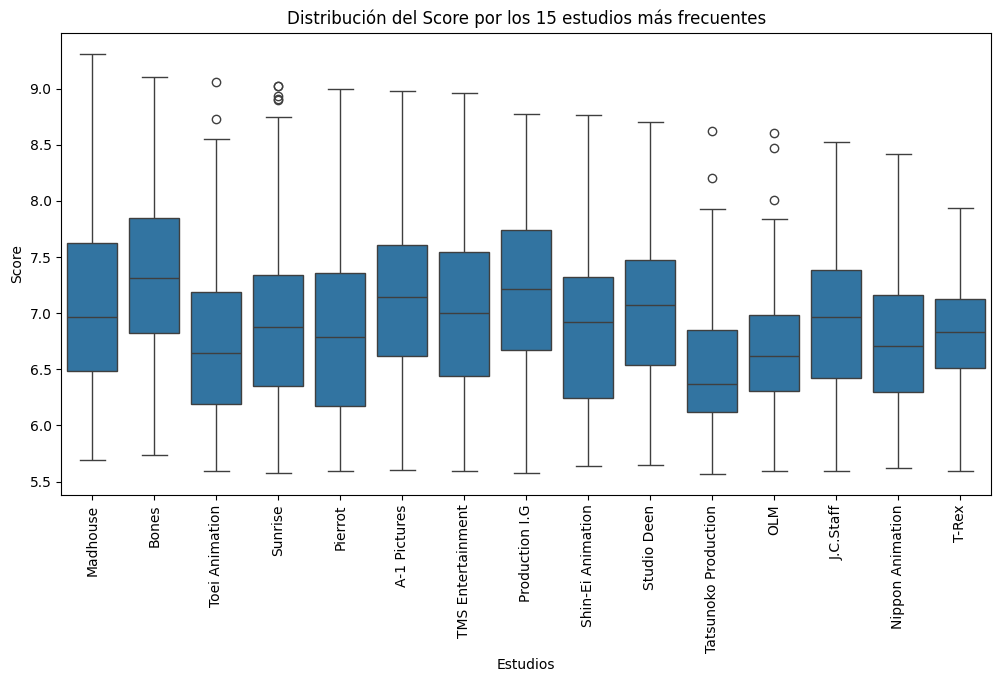

In [17]:
nuevo_df_limpio = nuevo_df.dropna(subset=['studios', 'score'])
top_15_estudios = nuevo_df_limpio['studios'].value_counts().head(15).index
nuevo_df_top_15 = nuevo_df_limpio[nuevo_df_limpio['studios'].isin(top_15_estudios)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=nuevo_df_top_15, x='studios', y='score')
plt.xticks(rotation=90)
plt.title('Distribución del Score por los 15 estudios más frecuentes')
plt.xlabel('Estudios')
plt.ylabel('Score')
plt.show()

In [18]:
nuevo_df_top_15 = nuevo_df_limpio[nuevo_df_limpio['studios'].isin(top_15_estudios) & (nuevo_df_limpio['episodes'] >= 6)]

mejor_anime_por_estudio = nuevo_df_top_15.loc[nuevo_df_top_15.groupby('studios')['score'].idxmax()]

print(mejor_anime_por_estudio[['studios', 'name', 'score']])

                   studios                                               name  \
13            A-1 Pictures         Kaguya-sama wa Kokurasetai: Ultra Romantic   
1                    Bones                   Fullmetal Alchemist: Brotherhood   
138              J.C.Staff                                Bakuman. 3rd Season   
0                 Madhouse                                  Sousou no Frieren   
191       Nippon Animation                                    Hunter x Hunter   
100                    OLM                               Kenpuu Denki Berserk   
11                 Pierrot                          Bleach: Sennen Kessen-hen   
40          Production I.G  Haikyuu!! Karasuno Koukou vs. Shiratorizawa Ga...   
42       Shin-Ei Animation           Boku no Kokoro no Yabai Yatsu 2nd Season   
63             Studio Deen  Shouwa Genroku Rakugo Shinjuu: Sukeroku Futata...   
8                  Sunrise                                           Gintama'   
1106                 T-Rex  

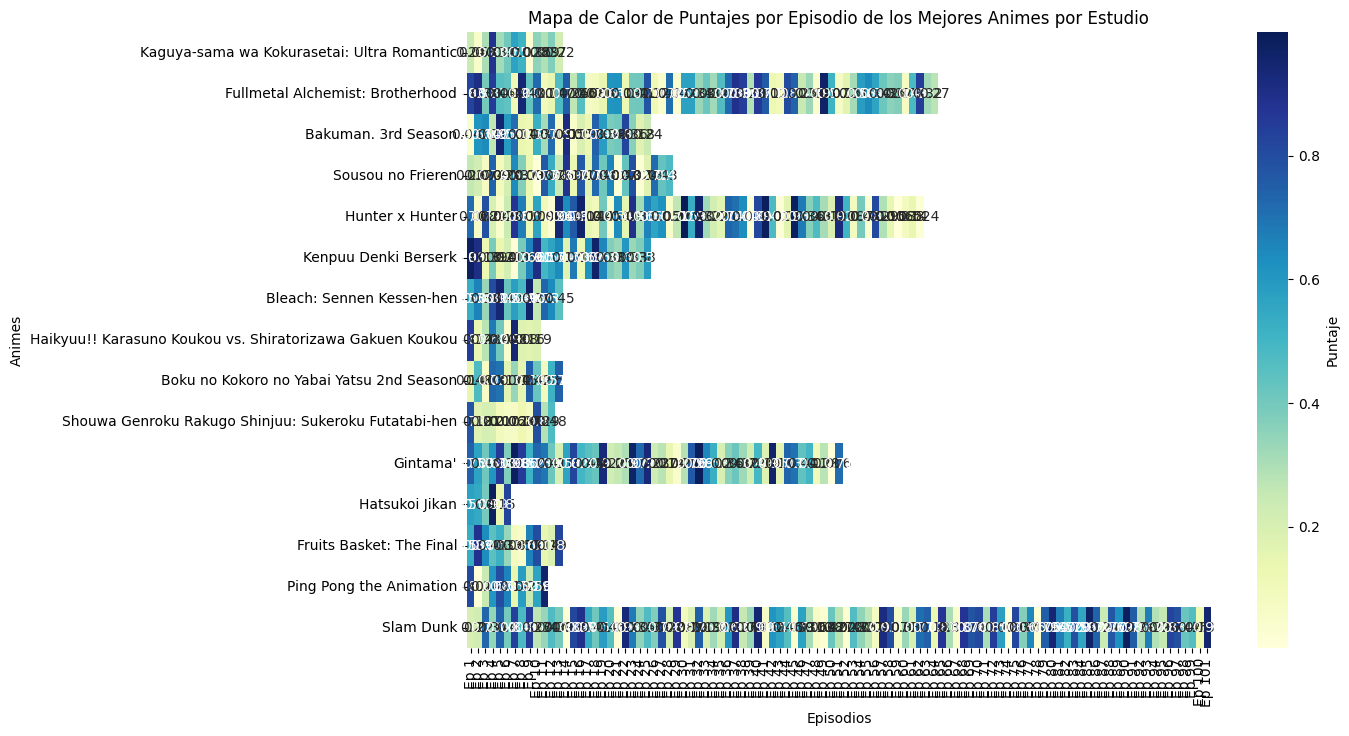

In [19]:
nuevo_df_top_15 = nuevo_df_limpio[nuevo_df_limpio['studios'].isin(top_15_estudios) & (nuevo_df_limpio['episodes'] >= 6)]
mejor_anime_por_estudio = nuevo_df_top_15.loc[nuevo_df_top_15.groupby('studios')['score'].idxmax()]


animes = []
episodios = []
puntajes = []


for idx, row in mejor_anime_por_estudio.iterrows():
    anime_name = row['name']
    estudio_name = row['studios']
    episodios_count = int(row['episodes']) if pd.notnull(row['episodes']) else 5

    episodios_puntajes = np.random.rand(episodios_count)


    animes.append(anime_name)
    episodios.append([f"Ep {i+1}" for i in range(episodios_count)])
    puntajes.append(episodios_puntajes)


df_puntajes = pd.DataFrame({
    'anime': animes,
    'episodios': episodios,
    'puntajes': puntajes
})


heatmap_data = pd.DataFrame(df_puntajes['puntajes'].tolist(), index=df_puntajes['anime'], columns=[f"Ep {i+1}" for i in range(df_puntajes['puntajes'].apply(len).max())])


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Puntaje'}, xticklabels=True, yticklabels=True)
plt.title('Mapa de Calor de Puntajes por Episodio de los Mejores Animes por Estudio')
plt.xlabel('Episodios')
plt.ylabel('Animes')
plt.show()

In [20]:
nuevo_df_filtrado = nuevo_df_rellenado[
    (nuevo_df_rellenado['score'] != 'Unknown') & (nuevo_df_rellenado['premiered'] != 'Unknown')
]
nuevo_df_filtrado.loc[:, 'score'] = pd.to_numeric(nuevo_df_filtrado['score'], errors='coerce')
anime_mas_alto = nuevo_df_filtrado.loc[nuevo_df_filtrado['score'].idxmax()]
anime_mas_alto[['name', 'score', 'premiered']]

,0
name,Sousou no Frieren
score,9.31
premiered,fall 2023


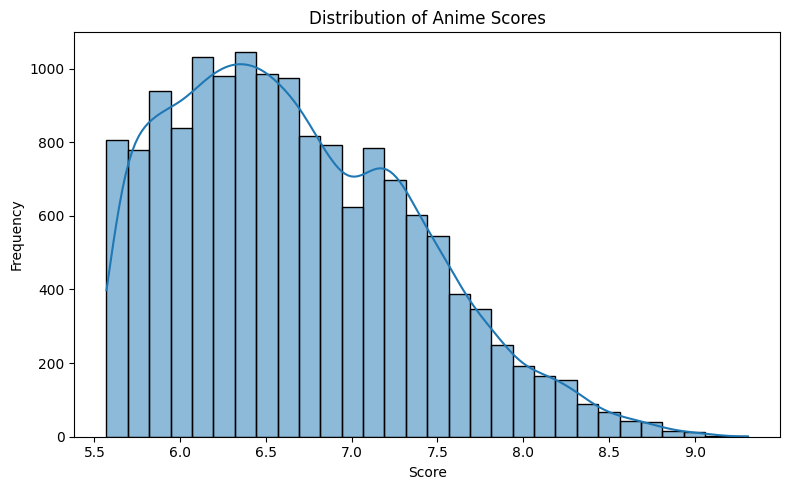

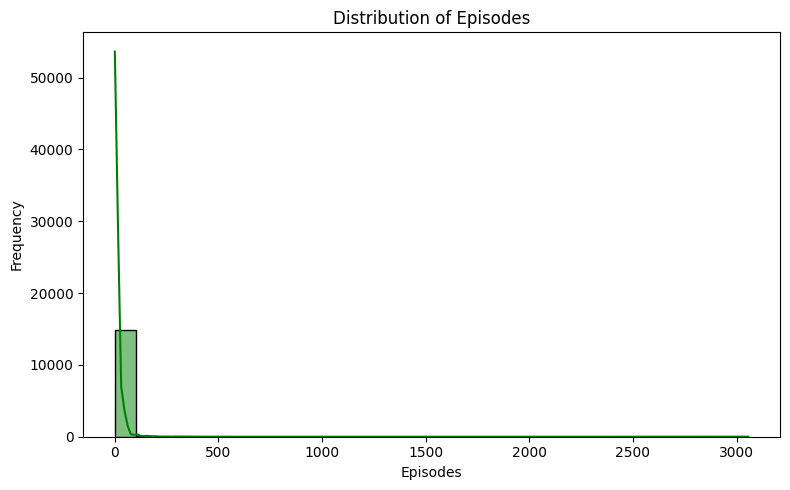

In [21]:

plt.figure(figsize=(8, 5))
sns.histplot(nuevo_df_rellenado['score'].dropna(), kde=True, bins=30)
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(nuevo_df_rellenado['episodes'].dropna(), kde=True, bins=30, color='green')
plt.title('Distribution of Episodes')
plt.xlabel('Episodes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<ipython-input-22-de4bf600995d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='type', data=nuevo_df_rellenado, order=nuevo_df_rellenado['type'].value_counts().index, palette='Set2')


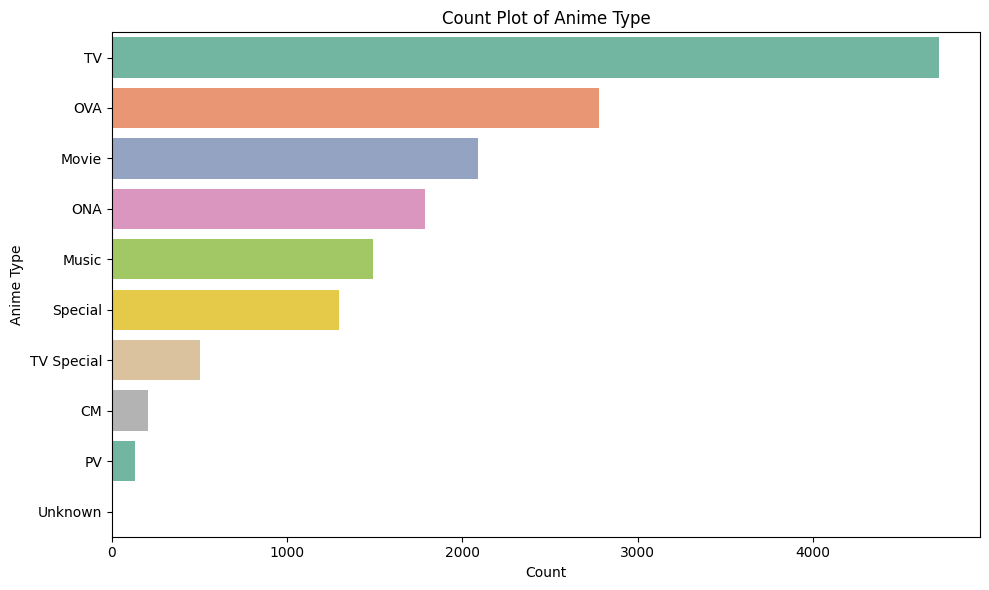

<ipython-input-22-de4bf600995d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=nuevo_df_rellenado, order=nuevo_df_rellenado['rating'].value_counts().index, palette='Set2')


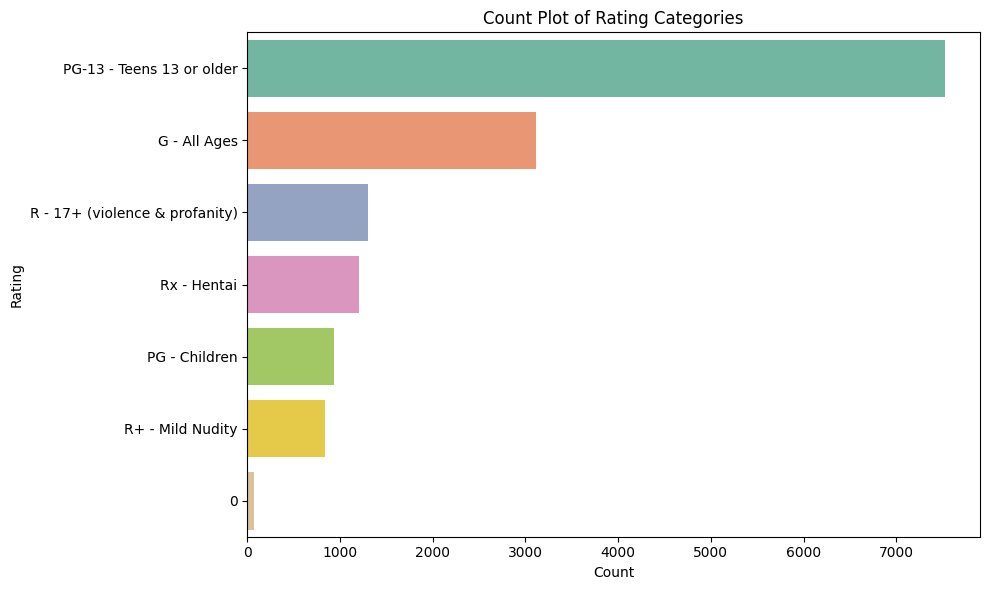

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(y='type', data=nuevo_df_rellenado, order=nuevo_df_rellenado['type'].value_counts().index, palette='Set2')
plt.title('Count Plot of Anime Type')
plt.xlabel('Count')
plt.ylabel('Anime Type')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='rating', data=nuevo_df_rellenado, order=nuevo_df_rellenado['rating'].value_counts().index, palette='Set2')
plt.title('Count Plot of Rating Categories')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


In [23]:
animes_mayor_7 = nuevo_df_limpio[nuevo_df_limpio['score'] > 7]

estudios_one_hit_wonder = animes_mayor_7.groupby('studios').filter(lambda x: len(x) == 1)

top_5_estudios = estudios_one_hit_wonder.nlargest(5, 'score')

print(top_5_estudios[['studios', 'name', 'score']])

                                       studios                  name  score
10         K-Factory, Kitty Film Mitaka Studio  Ginga Eiyuu Densetsu   9.01
35                                        LICO           Alien Stage   8.78
52  Toei Animation, DandeLion Animation Studio   The First Slam Dunk   8.73
72                               Studio DURIAN             Look Back   8.67
79                               OLM, P.I.C.S.              Odd Taxi   8.65


comparacion
DB
naruto
OP
Bleach


---



In [24]:
nuevo_df_rellenado.loc[nuevo_df_rellenado['name'].str.contains('Naruto', case=False, na=False), 'name'] = 'Naruto'
nuevo_df_rellenado.loc[nuevo_df_rellenado['name'].str.contains('One Piece', case=False, na=False), 'name'] = 'One Piece'
nuevo_df_rellenado.loc[nuevo_df_rellenado['name'].str.contains('Dragon Ball', case=False, na=False), 'name'] = 'Dragon Ball'
nuevo_df_rellenado.loc[nuevo_df_rellenado['name'].str.contains('Bleach', case=False, na=False), 'name'] = 'Bleach'

dragon_ball_animes = nuevo_df_rellenado[nuevo_df_rellenado['name'] == 'Dragon Ball']
Naruto_animes = nuevo_df_rellenado[nuevo_df_rellenado['name'] == 'Naruto']
onepiece_animes = nuevo_df_rellenado[nuevo_df_rellenado['name'] == 'One Piece']
bleach_animes = nuevo_df_rellenado[nuevo_df_rellenado['name'] == 'Bleach']

count_dragon_ball = dragon_ball_animes.shape[0]
count_naruto = Naruto_animes.shape[0]
count_onepiece = onepiece_animes.shape[0]
count_bleach = bleach_animes.shape[0]

print(f'Número de animes de Dragon Ball: {count_dragon_ball}')
print(f'Número de animes de Naruto: {count_naruto}')
print(f'Número de animes de One Piece: {count_onepiece}')
print(f'Número de animes de Bleach: {count_bleach}')

Número de animes de Dragon Ball: 44
Número de animes de Naruto: 27
Número de animes de One Piece: 76
Número de animes de Bleach: 15


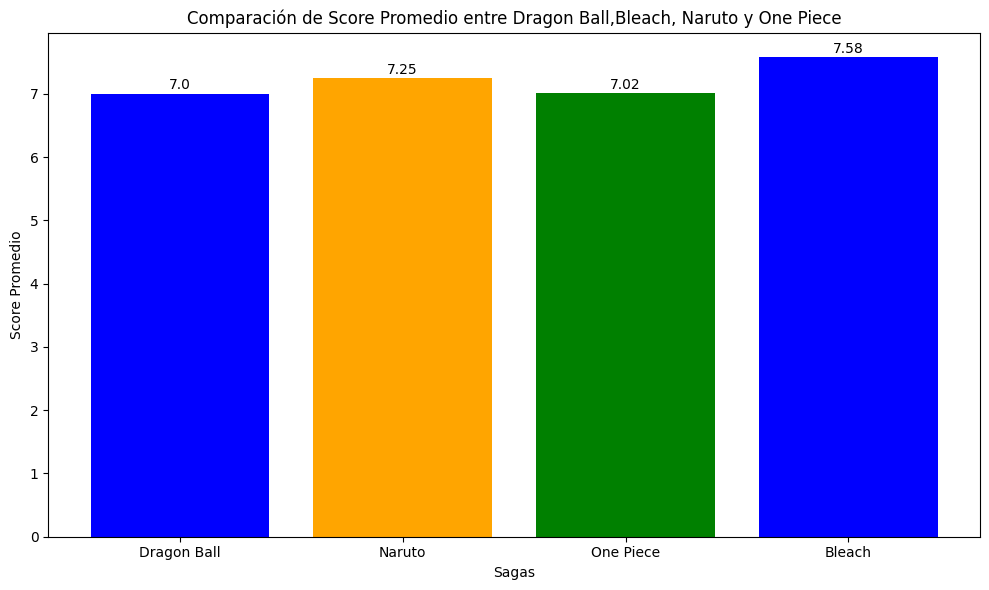

In [25]:
comparacion = {
    'Dragon Ball': dragon_ball_animes['score'].mean(),
    'Naruto': Naruto_animes['score'].mean(),
    'One Piece': onepiece_animes['score'].mean(),
    'Bleach': bleach_animes['score'].mean()
}

plt.figure(figsize=(10, 6))
bars = plt.bar(comparacion.keys(), comparacion.values(), color=['blue', 'orange', 'green'])
plt.title('Comparación de Score Promedio entre Dragon Ball,Bleach, Naruto y One Piece')
plt.ylabel('Score Promedio')
plt.xlabel('Sagas')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

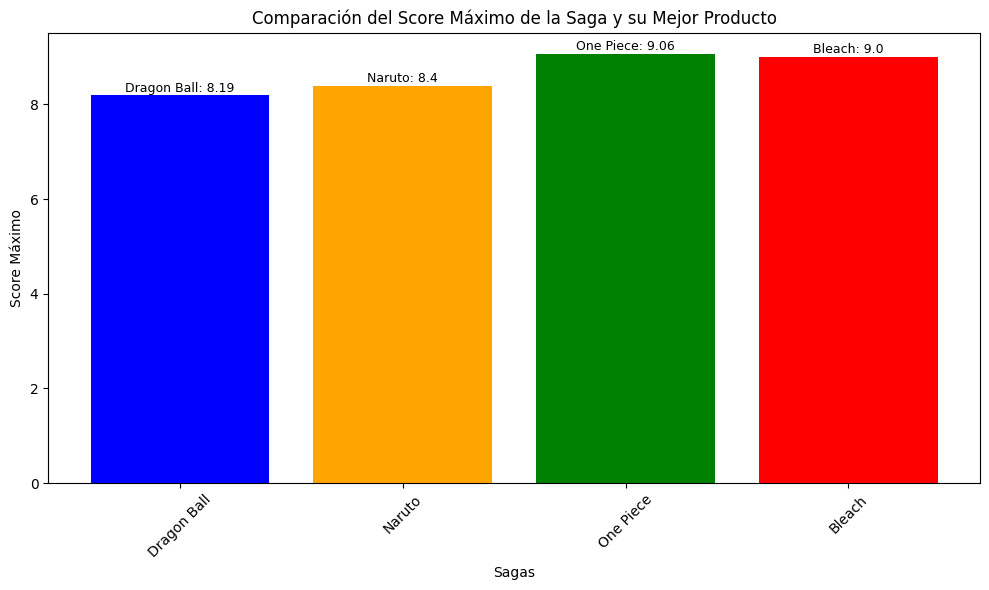

In [27]:
comparacion_max = {
    'Dragon Ball': dragon_ball_animes.loc[dragon_ball_animes['score'].idxmax()]['name'],
    'Naruto': Naruto_animes.loc[Naruto_animes['score'].idxmax()]['name'],
    'One Piece': onepiece_animes.loc[onepiece_animes['score'].idxmax()]['name'],
    'Bleach': nuevo_df_rellenado[nuevo_df_rellenado['name'].str.contains('Bleach', case=False, na=False)]
        .loc[nuevo_df_rellenado[nuevo_df_rellenado['name'].str.contains('Bleach', case=False, na=False)]['score'].idxmax()]['name']
}

puntajes = {
    'Dragon Ball': dragon_ball_animes['score'].max(),
    'Naruto': Naruto_animes['score'].max(),
    'One Piece': onepiece_animes['score'].max(),
    'Bleach': nuevo_df_rellenado[nuevo_df_rellenado['name'].str.contains('Bleach', case=False, na=False)]['score'].max()
}

plt.figure(figsize=(10, 6))
bars = plt.bar(comparacion_max.keys(), puntajes.values(), color=['blue', 'orange', 'green', 'red'])

plt.title('Comparación del Score Máximo de la Saga y su Mejor Producto')
plt.ylabel('Score Máximo')
plt.xlabel('Sagas')
plt.xticks(rotation=45)

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02,
             f'{comparacion_max[list(comparacion_max.keys())[i]]}: {round(yval, 2)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

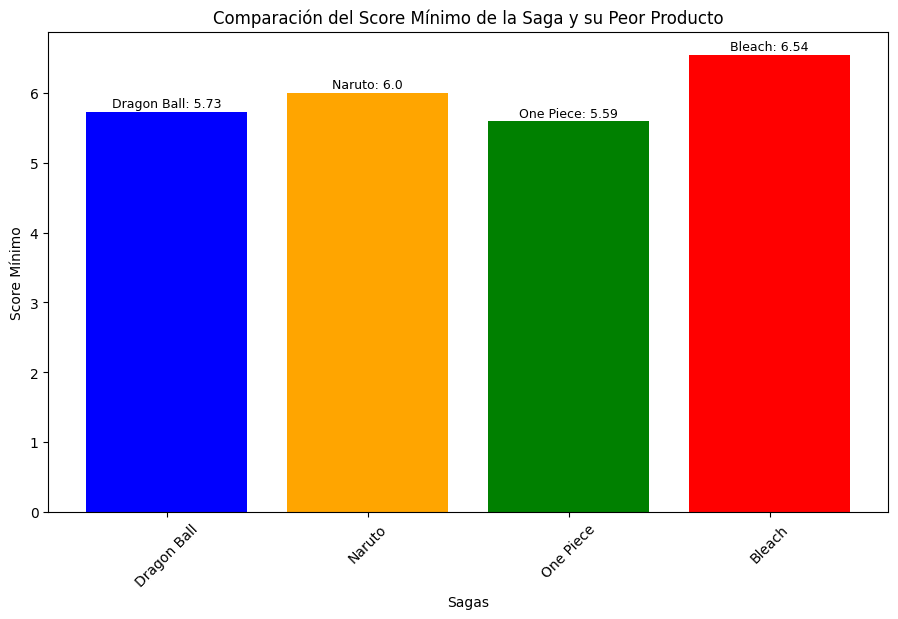

In [28]:
comparacion_min = {
    'Dragon Ball': dragon_ball_animes.loc[dragon_ball_animes['score'].idxmin()]['name'],
    'Naruto': Naruto_animes.loc[Naruto_animes['score'].idxmin()]['name'],
    'One Piece': onepiece_animes.loc[onepiece_animes['score'].idxmin()]['name'],
    'Bleach': nuevo_df_rellenado[nuevo_df_rellenado['name'].str.contains('Bleach', case=False, na=False)]
        .loc[nuevo_df_rellenado[nuevo_df_rellenado['name'].str.contains('Bleach', case=False, na=False)]['score'].idxmin()]['name']
}

puntajes = {
    'Dragon Ball': dragon_ball_animes['score'].min(),
    'Naruto': Naruto_animes['score'].min(),
    'One Piece': onepiece_animes['score'].min(),
    'Bleach': nuevo_df_rellenado[nuevo_df_rellenado['name'].str.contains('Bleach', case=False, na=False)]['score'].min()
}

plt.figure(figsize=(12, 8))
bars = plt.bar(comparacion_min.keys(), puntajes.values(), color=['blue', 'orange', 'green', 'red'])
plt.title('Comparación del Score Mínimo de la Saga y su Peor Producto')
plt.ylabel('Score Mínimo')
plt.xlabel('Sagas')
plt.xticks(rotation=45)

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02,
             f'{comparacion_min[list(comparacion_min.keys())[i]]}: {round(yval, 2)}',
             ha='center', va='bottom', fontsize=9)

plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.3)  # Ajusta los márgenes sin tight_layout
plt.show()

El análisis de este dataset puede beneficiar a varios grupos:

📌 1. Empresas de Streaming y Distribuidoras de Anime
Netflix, Crunchyroll, Funimation, etc. pueden usar este análisis para identificar los animes mejor valorados y cuáles podrían adquirir para sus plataformas.

También podrían analizar tendencias y decidir qué animes promocionar más.

📌 2. Estudios de Animación y Productores
Toei Animation, MAPPA, Ufotable, Pierrot, etc. pueden analizar qué animes han tenido mejor puntuación para entender qué funciona mejor en términos de historia, animación y género.

Pueden usar esta información para decidir qué tipo de contenido producir en el futuro.

📌 3. Tiendas de Merchandising y Eventos de Anime
Empresas que venden figuras, ropa y accesorios de anime pueden usar los datos para identificar qué series son más populares y decidir en qué productos enfocarse.

📌 4. Creadores de Contenido y Medios de Comunicación
YouTubers, bloggers y periodistas de anime pueden usar los datos para hacer rankings, comparaciones y contenido sobre la evolución de la industria del anime.

📌 5. Investigadores y Analistas de Tendencias
Analistas pueden estudiar la evolución del anime a lo largo del tiempo, identificar patrones en la calidad de los animes según los estudios de animación o los géneros más exitosos.

📌 6. Fans y Comunidades de Anime
Los seguidores pueden descubrir nuevas series basándose en puntuaciones y tendencias de la comunidad.

1. Distribución del Score por los 15 Estudios más Frecuentes (Boxplot de distribución de puntajes por estudio):
Hipótesis:

Hipótesis 1A: "Los estudios más frecuentes tienen una mayor variabilidad en sus puntajes."

Razonamiento: Algunos estudios pueden tener tanto animes de alta calidad como de baja calidad, lo que generaría una mayor dispersión de los puntajes. El gráfico de cajas te permitirá ver la variabilidad dentro de cada estudio.

Hipótesis 1B: "Los estudios más frecuentes tienden a tener un puntaje promedio más alto."

Razonamiento: Al observar la mediana de los puntajes, podemos inferir si los estudios populares tienden a tener más producciones de calidad, comparado con estudios menos frecuentes.

2. Mejor Anime por Estudio (según Score)
Hipótesis:

Hipótesis 2A: "El mejor anime de cada estudio tiene un puntaje significativamente más alto que el resto de los animes del mismo estudio."

Razonamiento: Al identificar el mejor anime de cada estudio, podemos explorar si efectivamente estos animes sobresalen en puntajes y son excepcionales comparados con los demás animes del mismo estudio.

Hipótesis 2B: "Los estudios más grandes o conocidos tienen animes con puntajes más altos."

Razonamiento: Al observar qué animes tienen el puntaje más alto, podemos deducir si los estudios con más producción son más exitosos, o si los estudios con menos animes logran sobresalir más en calidad.

3. Mapa de Calor de Puntajes por Episodio de los Mejores Animes por Estudio
Hipótesis:

Hipótesis 3A: "Los mejores animes tienden a tener puntajes consistentes a lo largo de sus episodios."

Razonamiento: Al observar el mapa de calor, podemos ver si los mejores animes mantienen una calidad consistente a lo largo de sus episodios, lo que podría sugerir una producción de alta calidad.

Hipótesis 3B: "Algunos animes tienen un puntaje alto en sus primeros episodios, pero luego caen."

Razonamiento: A través del mapa de calor, podemos ver si hay animes que reciben críticas buenas al inicio y luego los puntajes disminuyen, lo cual podría indicar un desgaste o una baja en la calidad de los episodios posteriores.

4. Análisis del Anime con el Puntaje más Alto
Hipótesis:

Hipótesis 4A: "El anime con el puntaje más alto tiene una fecha de estreno reciente."

Razonamiento: El anime con el puntaje más alto puede ser un título reciente que ha sido bien recibido por la crítica y los fanáticos. Esto se puede comprobar observando la fecha de estreno y si es un anime reciente.

Hipótesis 4B: "El anime con el puntaje más alto tiene un número reducido de episodios."

Razonamiento: Es posible que el anime con puntajes altos sea una serie más corta, con menos episodios, lo que podría contribuir a una narrativa más enfocada y de mayor calidad, evitando el desgaste a medida que avanza la serie.

***Posibles Otras Hipótesis que Pueden Ser Exploradas:***

Impacto de la Cantidad de Episodios en el Puntaje:

Hipótesis 5A: "El número de episodios no tiene un impacto significativo en el puntaje de un anime."

Razonamiento: A pesar de que animes más largos pueden tener más variabilidad en sus episodios, el número de episodios no debería necesariamente correlacionarse de manera directa con un puntaje más bajo o más alto.

Efecto de la Estacionalidad (Fecha de estreno) en los Puntajes:

Hipótesis 6A: "Los animes estrenados en ciertas temporadas del año (por ejemplo, primavera o verano) tienen un puntaje promedio más alto que los estrenados en otras estaciones."

Razonamiento: Algunas estaciones podrían tener una mayor concentración de animes de alta calidad debido a factores como la cantidad de presupuestos o la competencia en esas temporadas.

1. ¿Cuál de las cuatro sagas (Dragon Ball, Bleach, One Piece, Naruto) tiene más productos (episodios, películas, o temporadas) en total?
Hipótesis: Dado que One Piece es una de las sagas más largas, probablemente tenga más productos en comparación con las demás sagas. Sin embargo, la cantidad de productos podría variar dependiendo de cómo se clasifiquen los episodios, películas o temporadas.

2. ¿Cuál de las cuatro sagas (Dragon Ball, Bleach, One Piece, Naruto) tiene el producto con el mejor score?
Hipótesis: Es probable que el mejor puntaje en cada saga provenga de un arco o temporada clave. Por ejemplo, Dragon Ball Z es conocido por tener una de las puntuaciones más altas de la saga, mientras que en Naruto, el final de Naruto Shippuden podría tener un puntaje sobresaliente.

3. ¿Cuál de las cuatro sagas (Dragon Ball, Bleach, One Piece, Naruto) tiene el producto con el peor score?
Hipótesis: Es probable que el peor puntaje de cada saga provenga de episodios de relleno o de temporadas que no fueron bien recibidas. Por ejemplo, Naruto Shippuden tiene muchos episodios de relleno que podrían afectar negativamente el puntaje promedio, mientras que en One Piece, los episodios más largos de relleno también podrían tener un impacto similar.